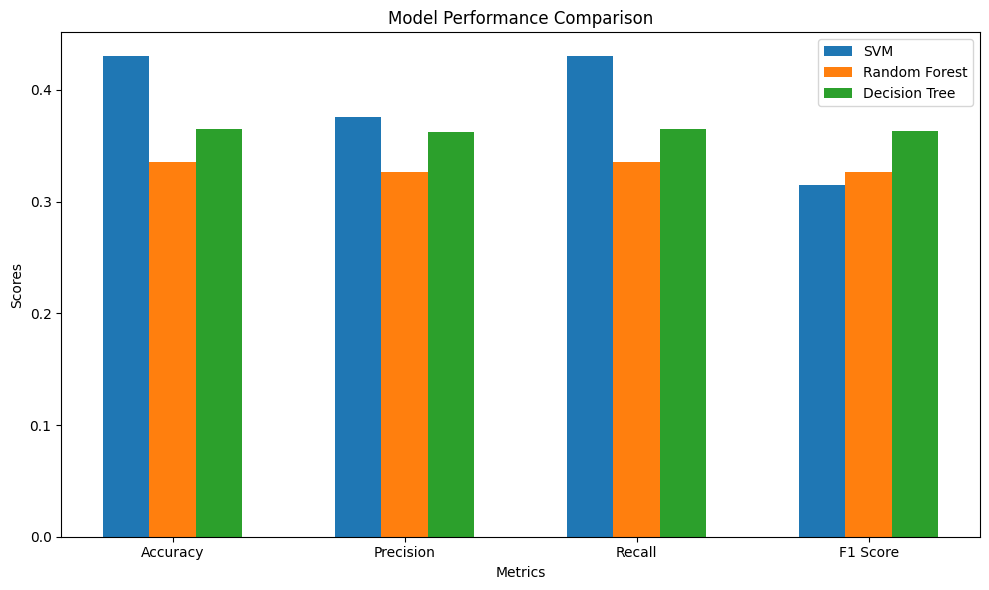

               Accuracy  Precision  Recall  F1 Score
SVM               0.430   0.375933   0.430  0.315167
Random Forest     0.335   0.326662   0.335  0.326290
Decision Tree     0.365   0.362663   0.365  0.363534


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = '/content/processed_space_traffic.csv'
data = pd.read_csv(file_path)

# Preprocessing
# Encode the target variable
label_encoder = LabelEncoder()
data['Traffic_Density_Category'] = label_encoder.fit_transform(data['Traffic_Density_Category'])

# Define features and target
X = data.drop(columns=['Traffic_Density_Category', 'Traffic_Density'])  # Drop target and redundant columns
y = data['Traffic_Density_Category']

# One-hot encode categorical columns if necessary
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
models = {
    'SVM': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    if name == 'SVM':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    }

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results).T

# Plot performance comparison
plt.figure(figsize=(10, 6))
bar_width = 0.2
x = np.arange(len(results_df.columns))

for i, model in enumerate(results_df.index):
    plt.bar(x + i * bar_width, results_df.loc[model], width=bar_width, label=model)

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(x + bar_width, results_df.columns)
plt.legend()
plt.tight_layout()
plt.show()

# Display results
print(results_df)
